In [2]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")
import matplotlib.pyplot as plt 

dj.blob.use_32bit_dims = True  # necessary for pd.blob read
import pandas as pd
import behav_viz.ingest as ingest
import behav_viz.visualize as viz
FIGURES_PATH = ingest.dir_utils.get_figures_path("rats", "beta_fixationgrower")

# settings
%load_ext autoreload
%autoreload 2

[2024-07-28 12:36:59,090][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-28 12:37:00,431][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [15]:
bdata = dj.create_virtual_module("bdata", "bdata")


In [32]:
date_min_key = f"sessiondate >= '2024-07-22'"
subject_session_key = {"ratname": "R033"}
bad_sessions = [964578, 964576, 964552, 964551]
sessid_key = [f"sessid != {bs}" for bs in bad_sessions]

In [25]:
sessid_key

['sessid != 964578', 'sessid != 96457', 'sessid != 964552', 'sessid != 964551']

In [33]:
exclusion_key = f"sessid NOT IN ({', '.join(map(str, bad_sessions))})"

In [34]:
exclusion_key

'sessid NOT IN (964578, 964576, 964552, 964551)'

In [35]:
pd = (bdata.Sessions & subject_session_key & date_min_key & exclusion_key).fetch(
    "protocol_data"
)

In [6]:
beta_1 = [
    "R033",
    "R039",
    "R010",
    "R012",
]
date_min = "2024-07-09"
today = datetime.today().date()
date_max = today.strftime("%Y-%m-%d")

trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_1, date_min=date_min
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_1, date_min=date_min, date_max=date_max, verbose=True
)

beta_2 = [
    "R034",
    "R036",
]

date_min = "2024-07-22"

trials_df2 = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_2, date_min=date_min
)
days_df2 = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_2, date_min=date_min, date_max=date_max, verbose=True
)

trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)
days_df = pd.concat([days_df, days_df2], ignore_index=True)

animal_id R033
Fetched 17 dates from Sessions table from 2024-07-09 to 2024-07-27 for R033

animal_id R039
Fetched 18 dates from Sessions table from 2024-07-09 to 2024-07-27 for R039

animal_id R010
Fetched 18 dates from Sessions table from 2024-07-09 to 2024-07-27 for R010

animal_id R012
Fetched 18 dates from Sessions table from 2024-07-09 to 2024-07-27 for R012

Fetched data from SessionAggDate table from 2024-07-09 to 2024-07-27  
	Last date on the database is 2024-07-27 but user is querying data 
	for 2024-07-28. Attempting to manually aggregate today's data.
No new data from today, 2024-07-28 to add to SessionAggDate.

70 daily summaries fetched for animals: 
['R033', 'R039', 'R010', 'R012']
between 2024-07-09 and 2024-07-27
animal_id R034
Not all variables are the same length. Cannot create proper DataFrame
result: 42
hits: 42
violations: 42
temperror: 42
hit_rate: 41
error_rate: 41
violation_rate: 41
temp_error_rate: 41
n_lpokes: 41
n_cpokes: 41
n_rpokes: 41
trial_dur: 41
trial

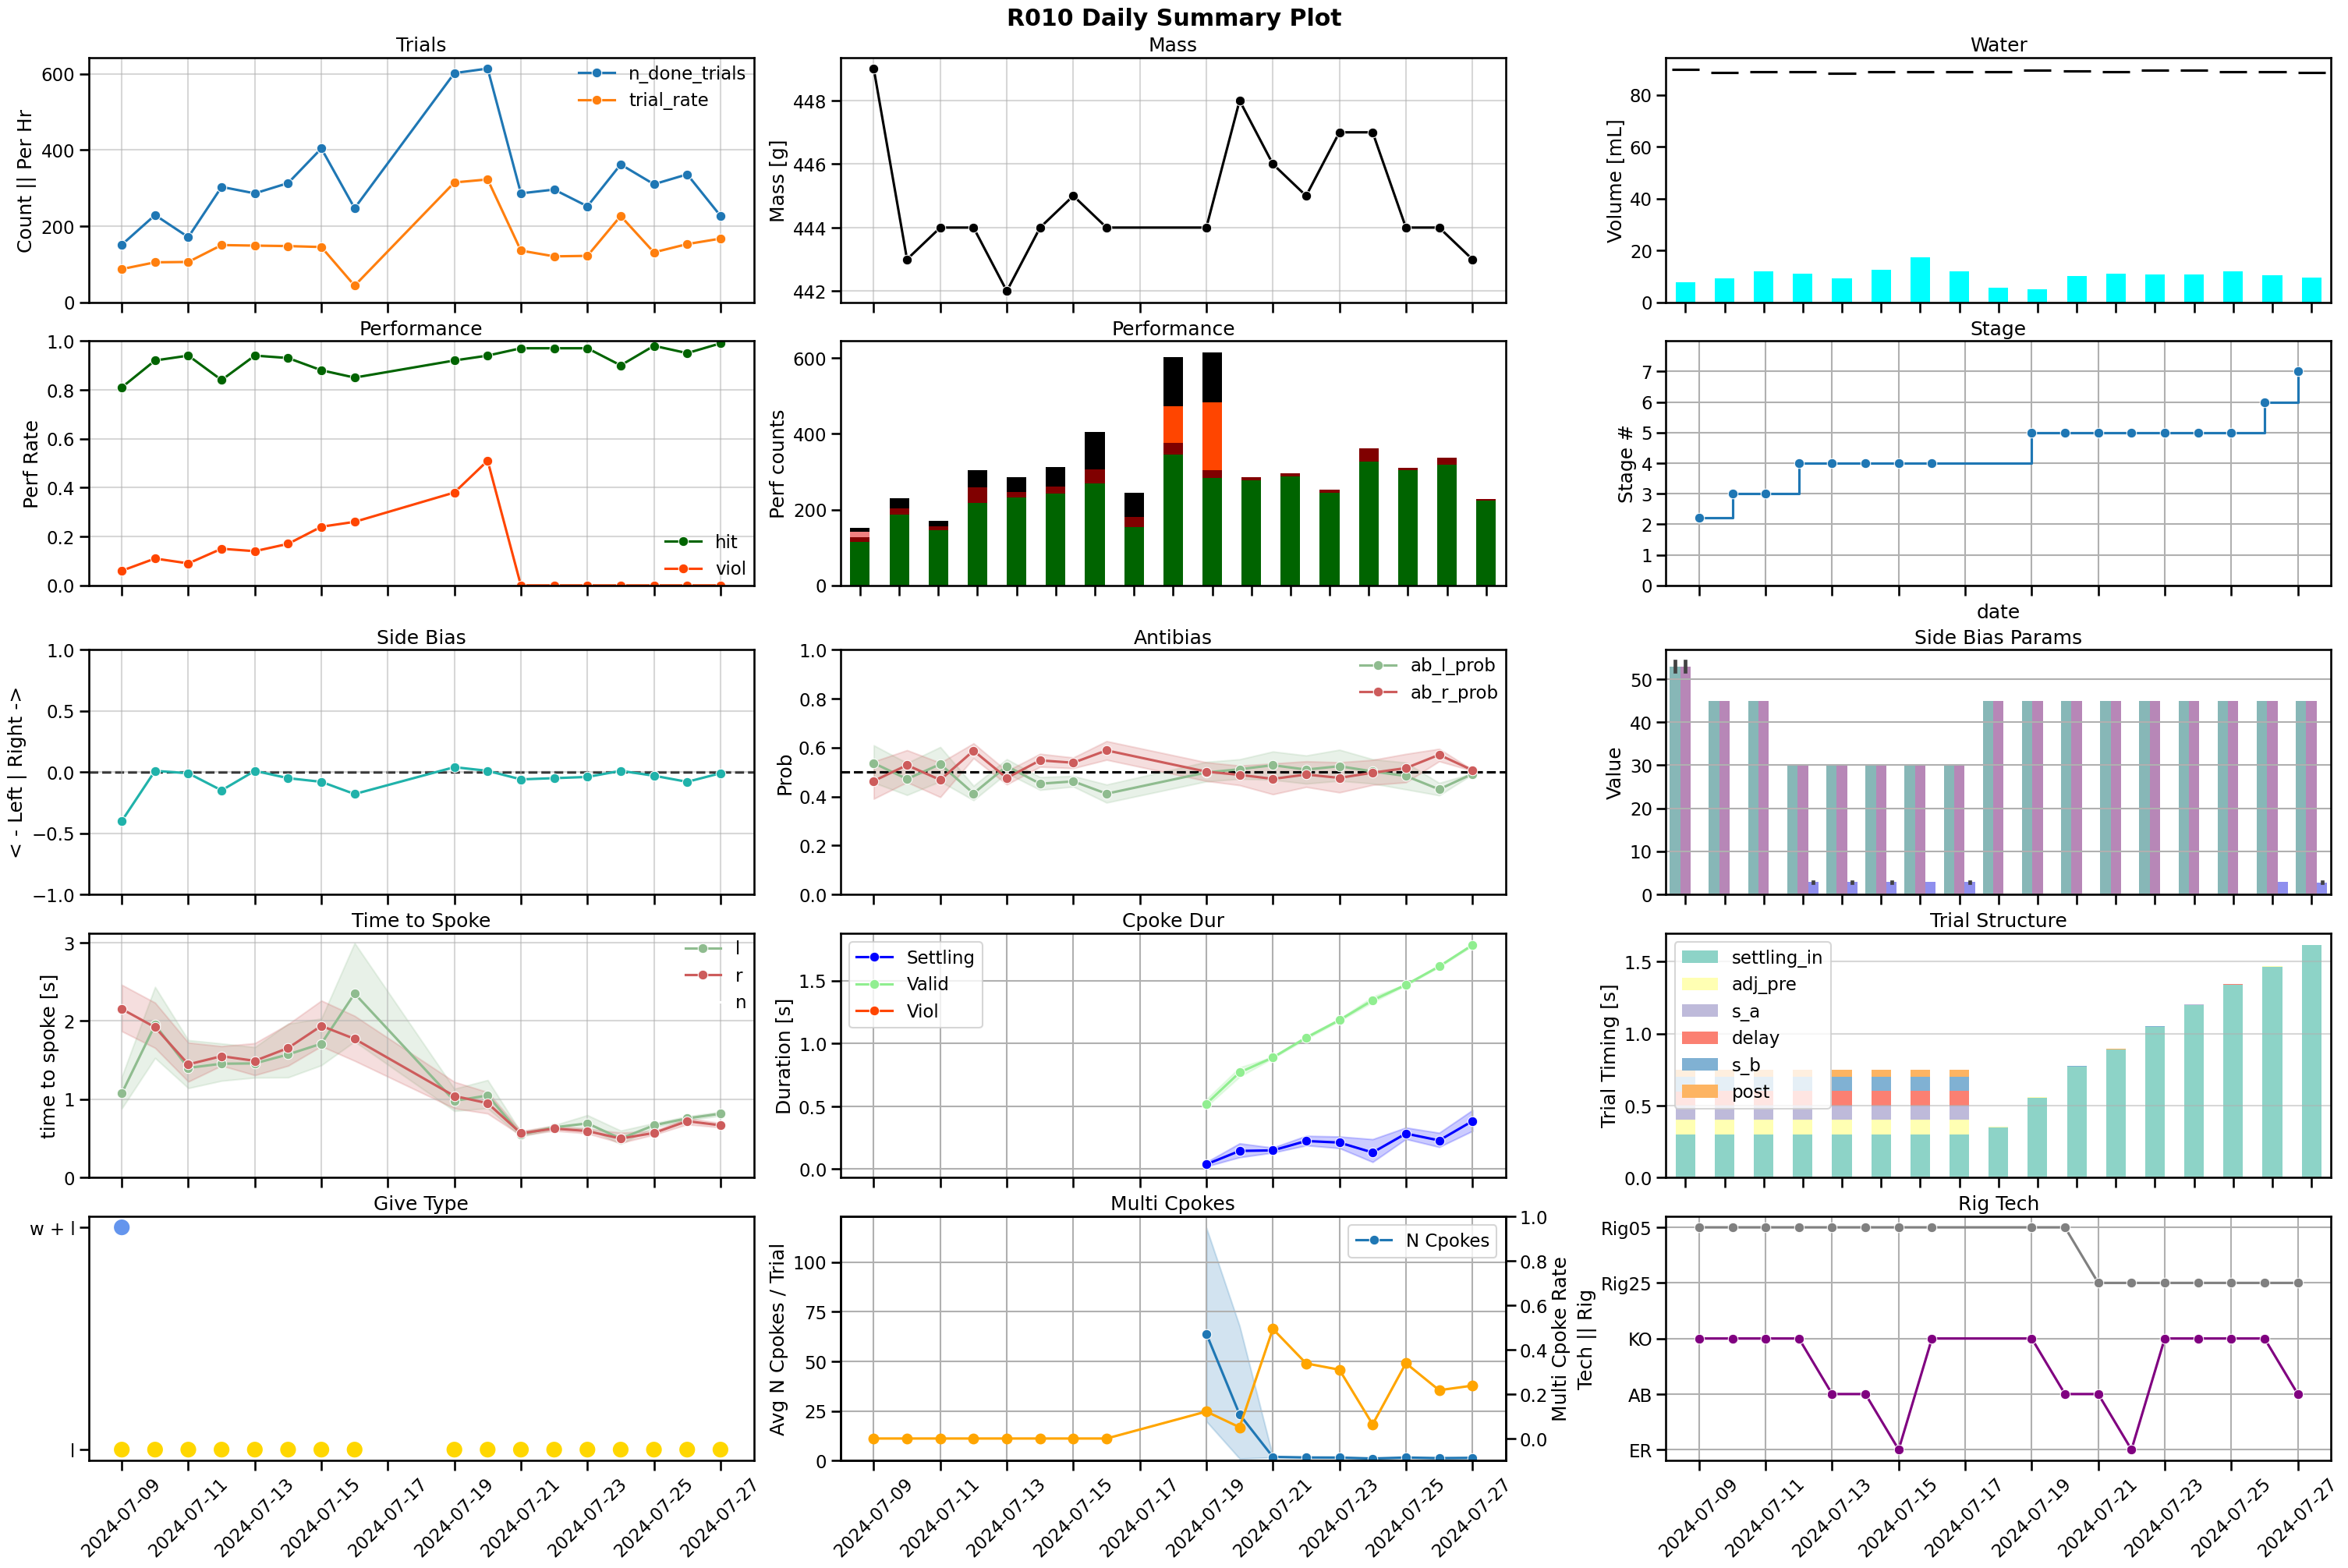

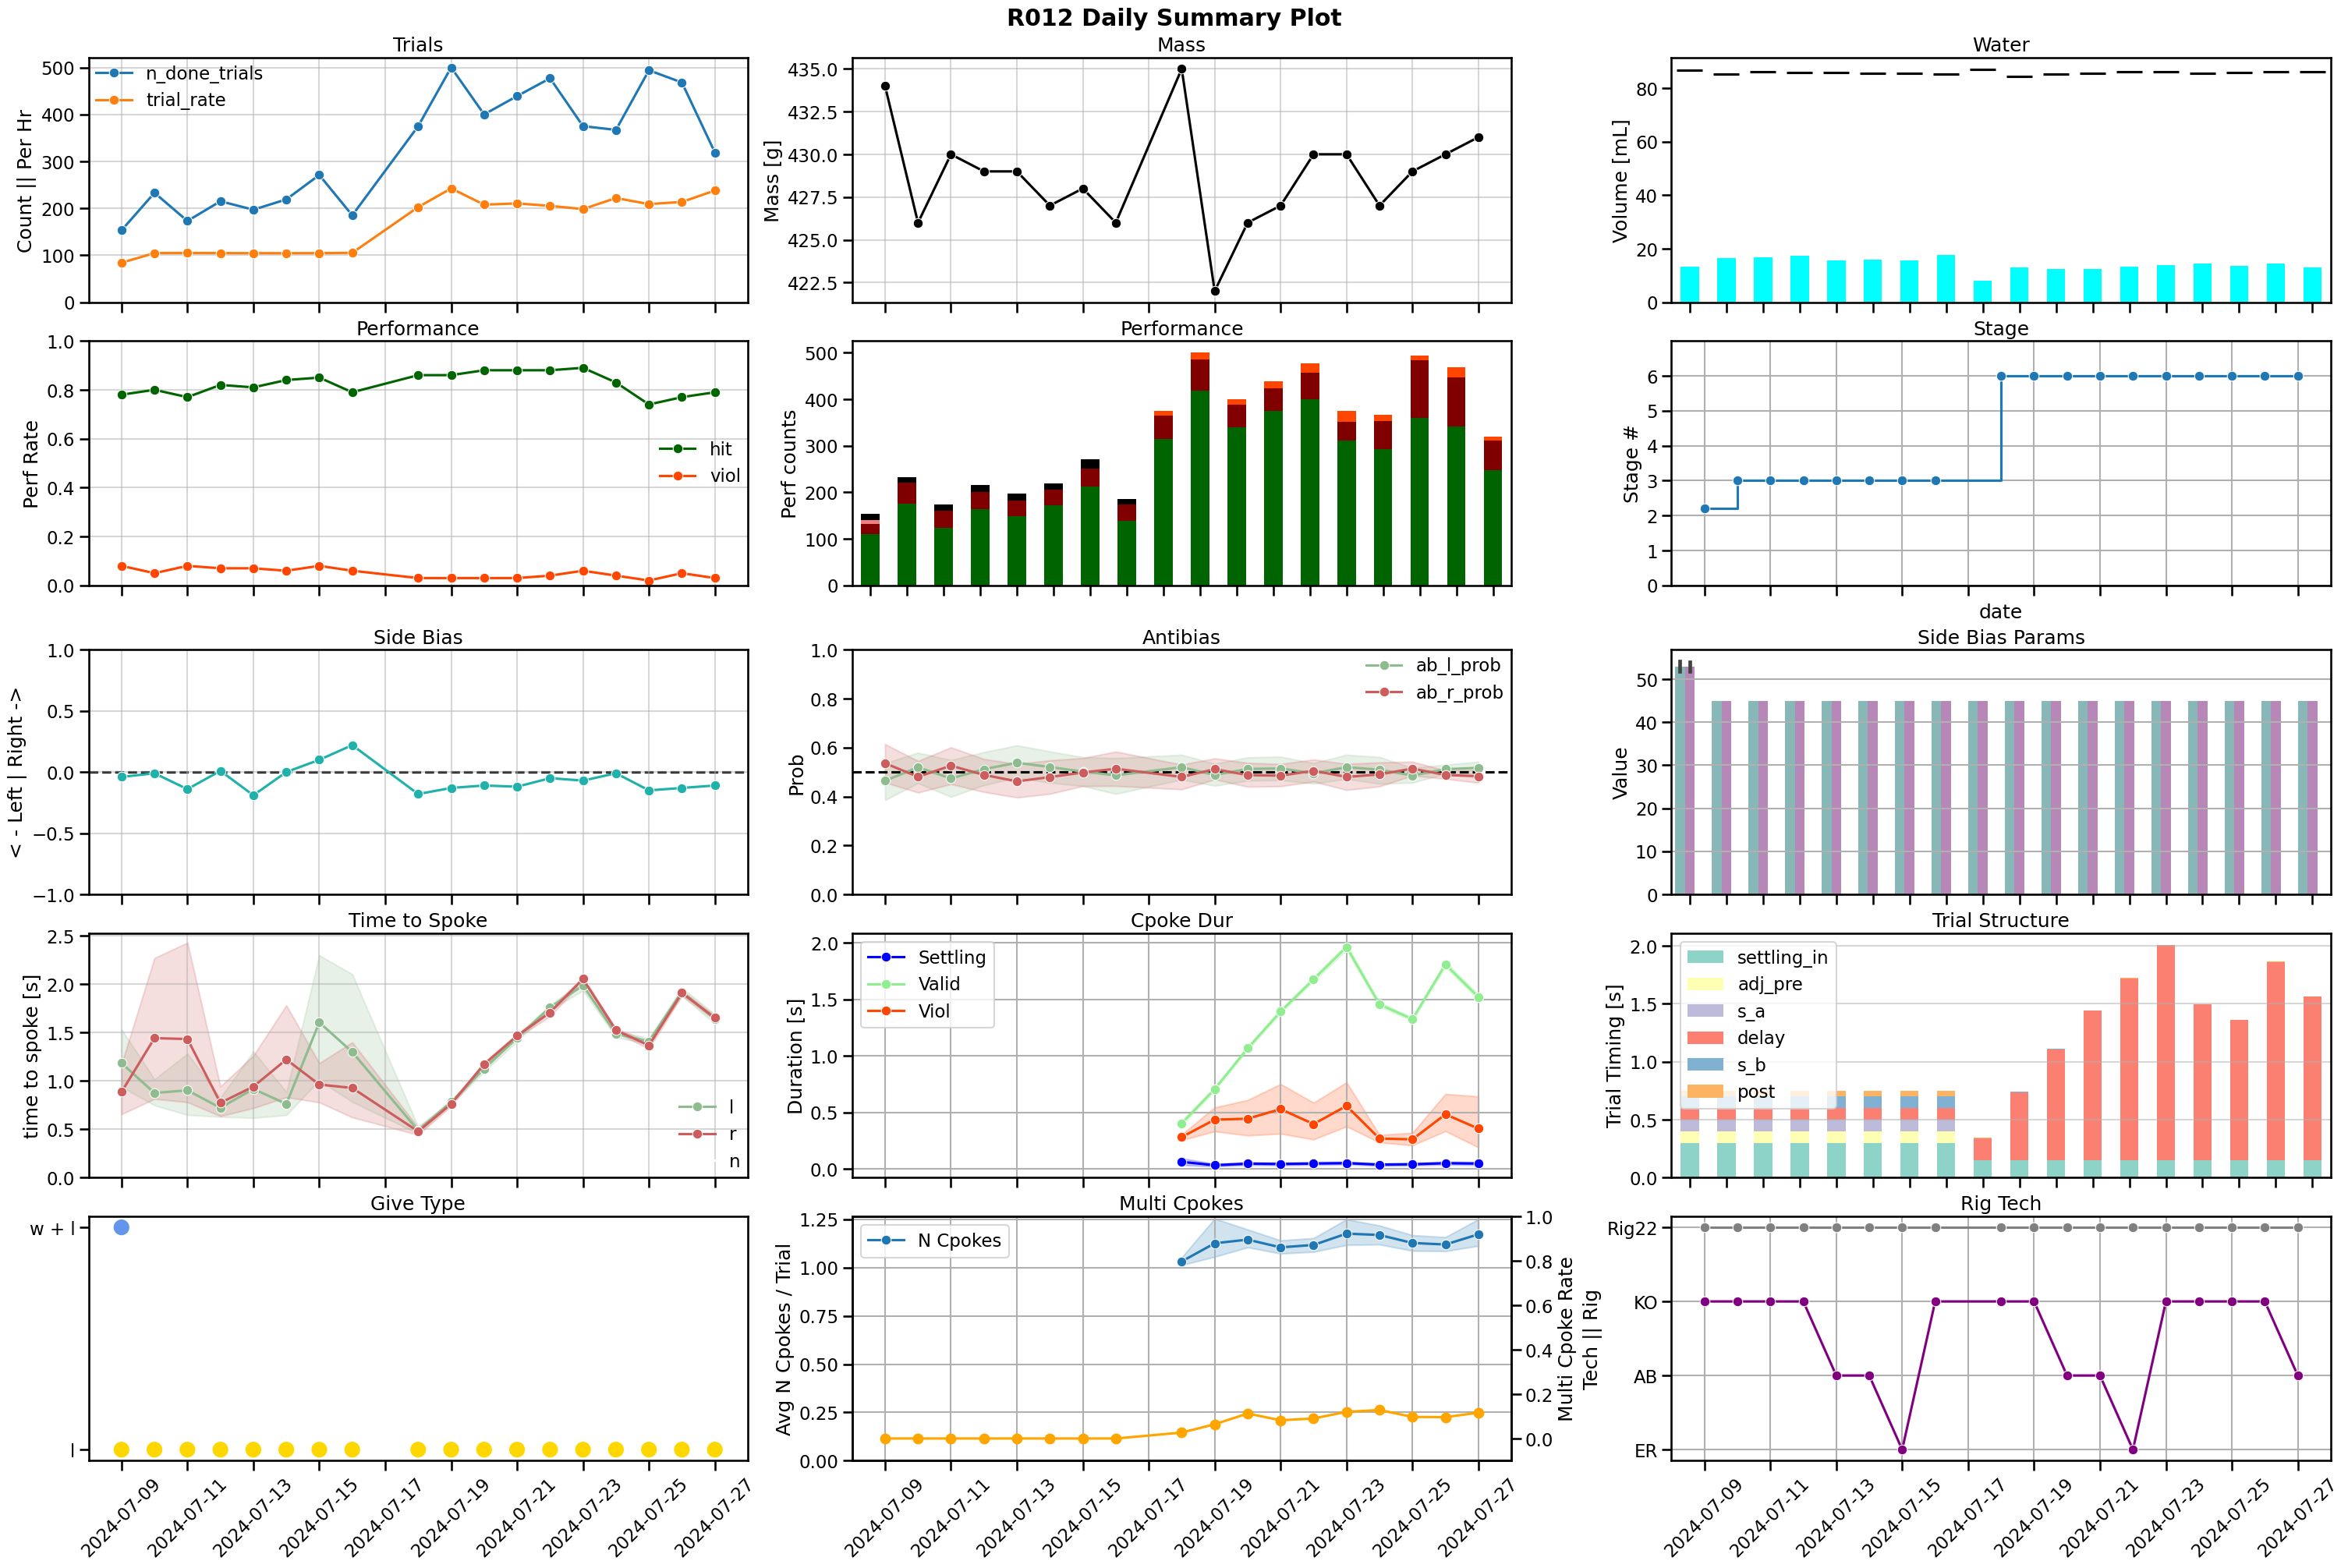

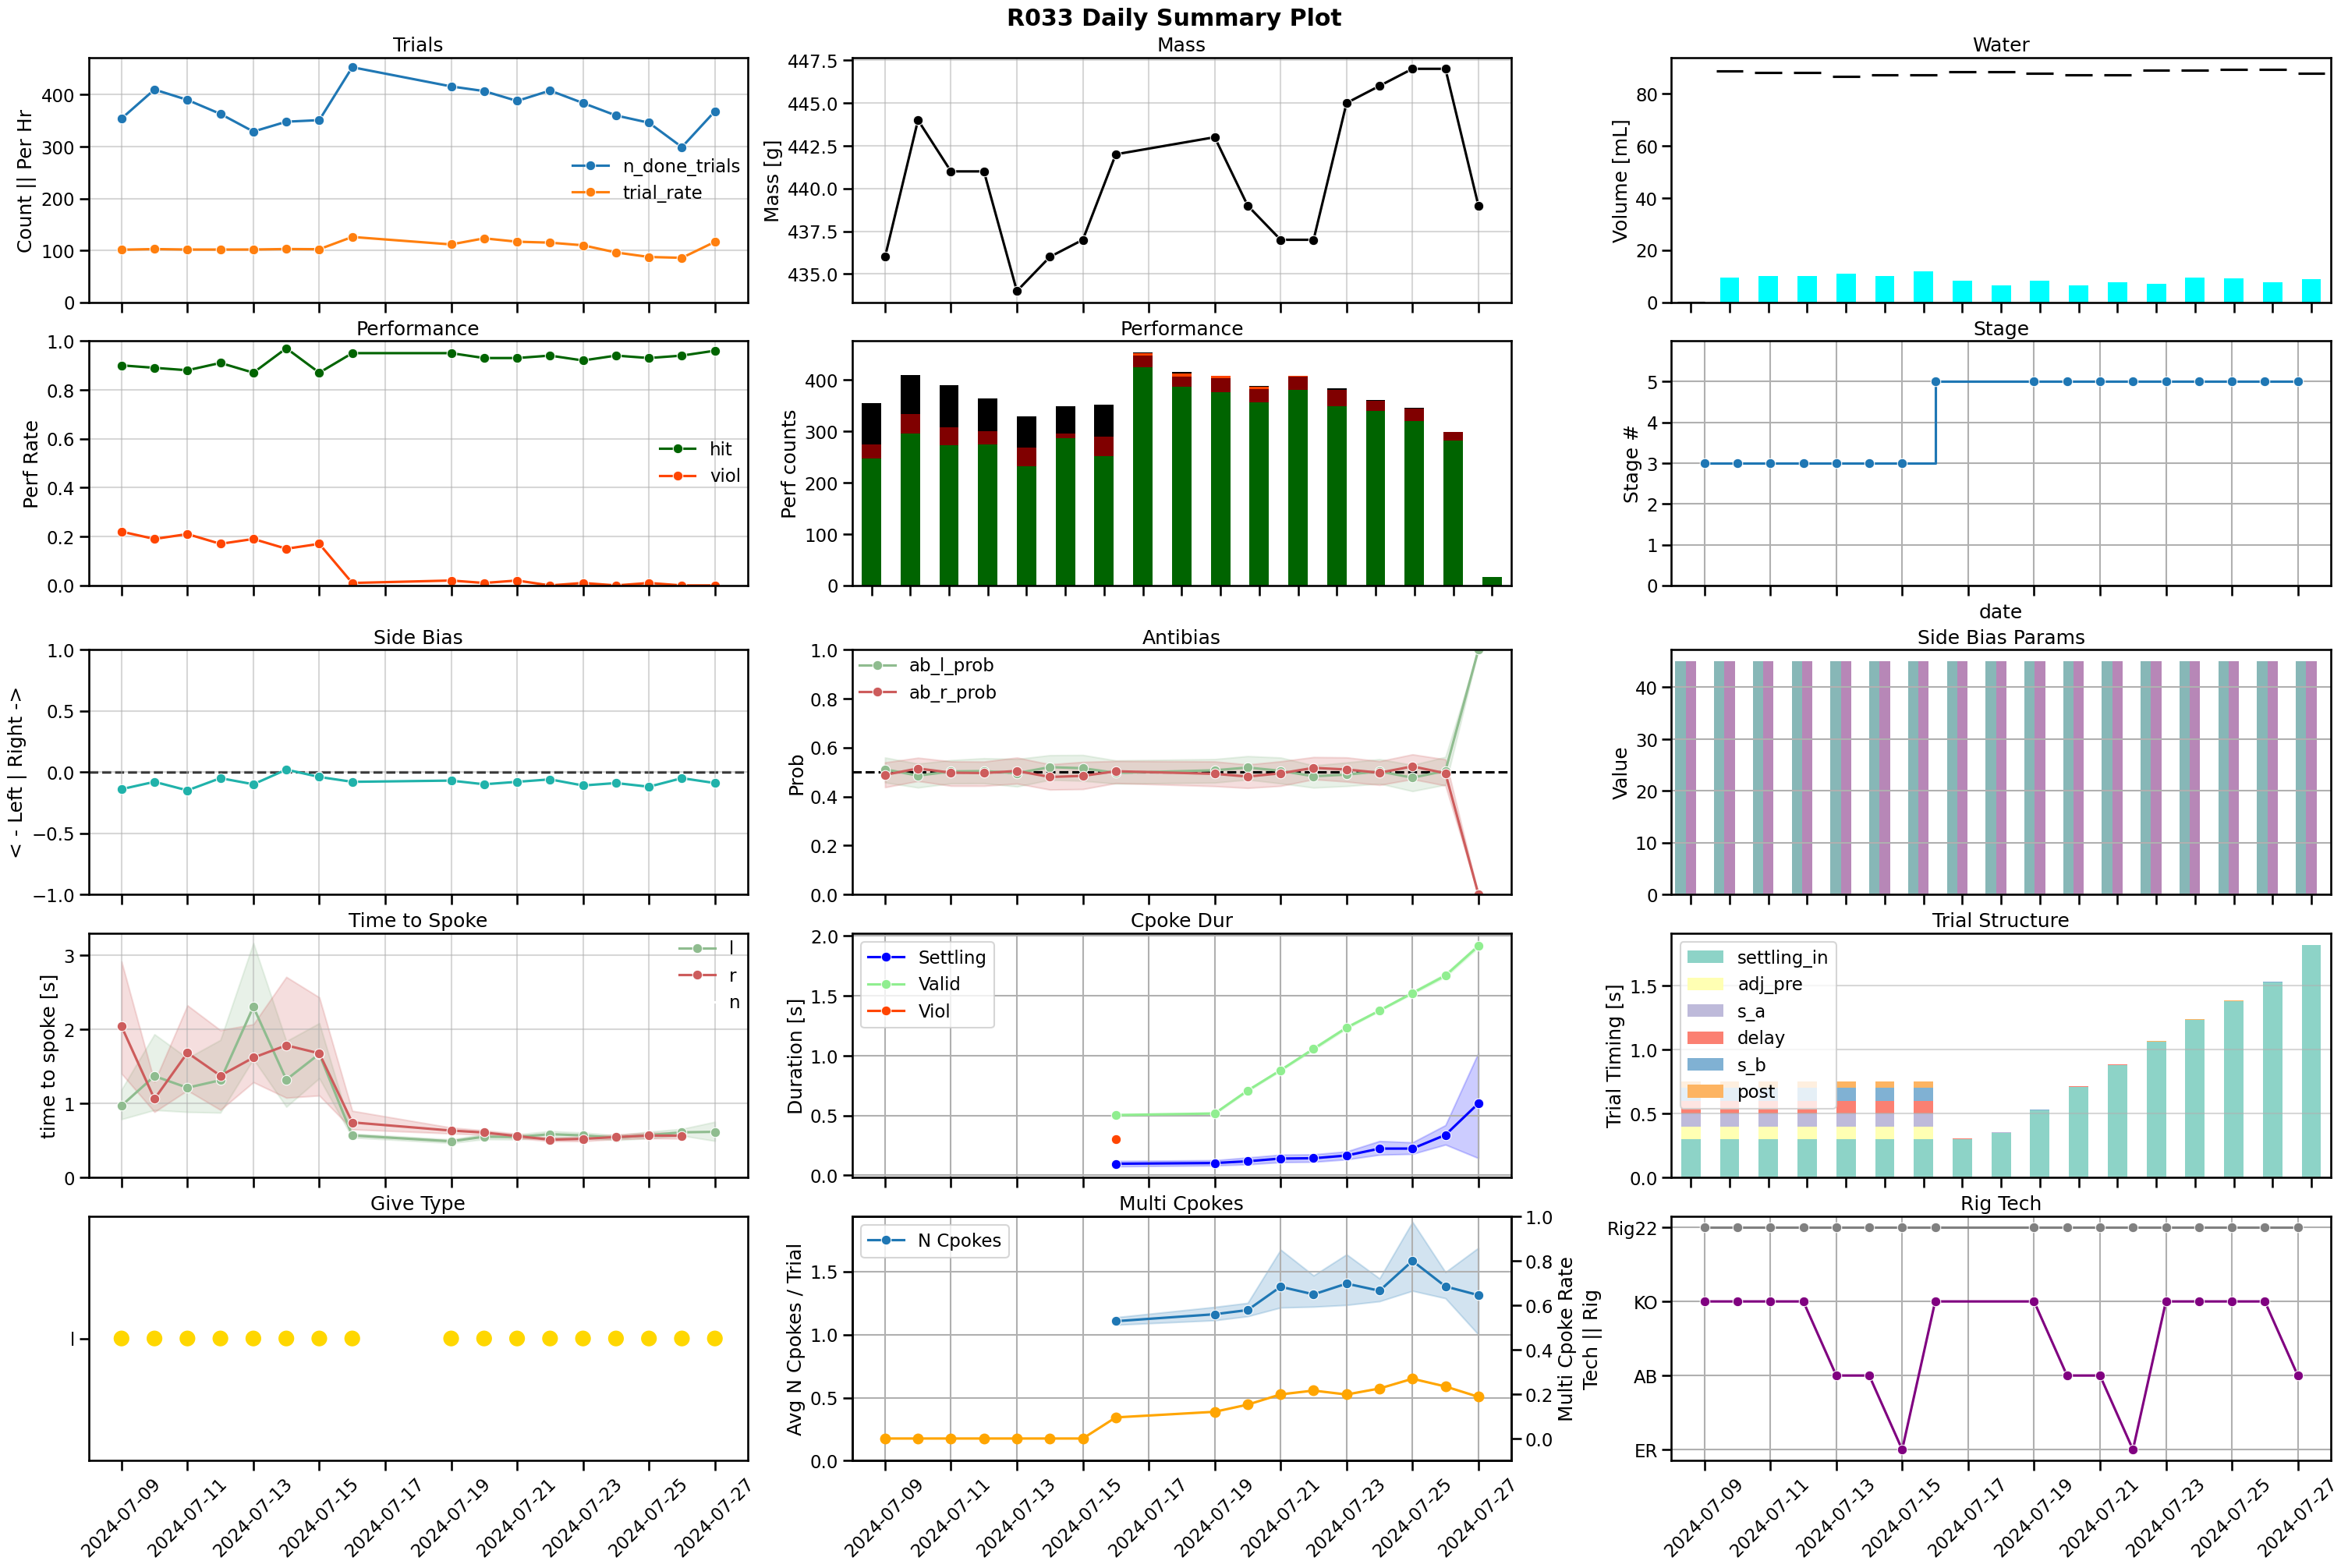

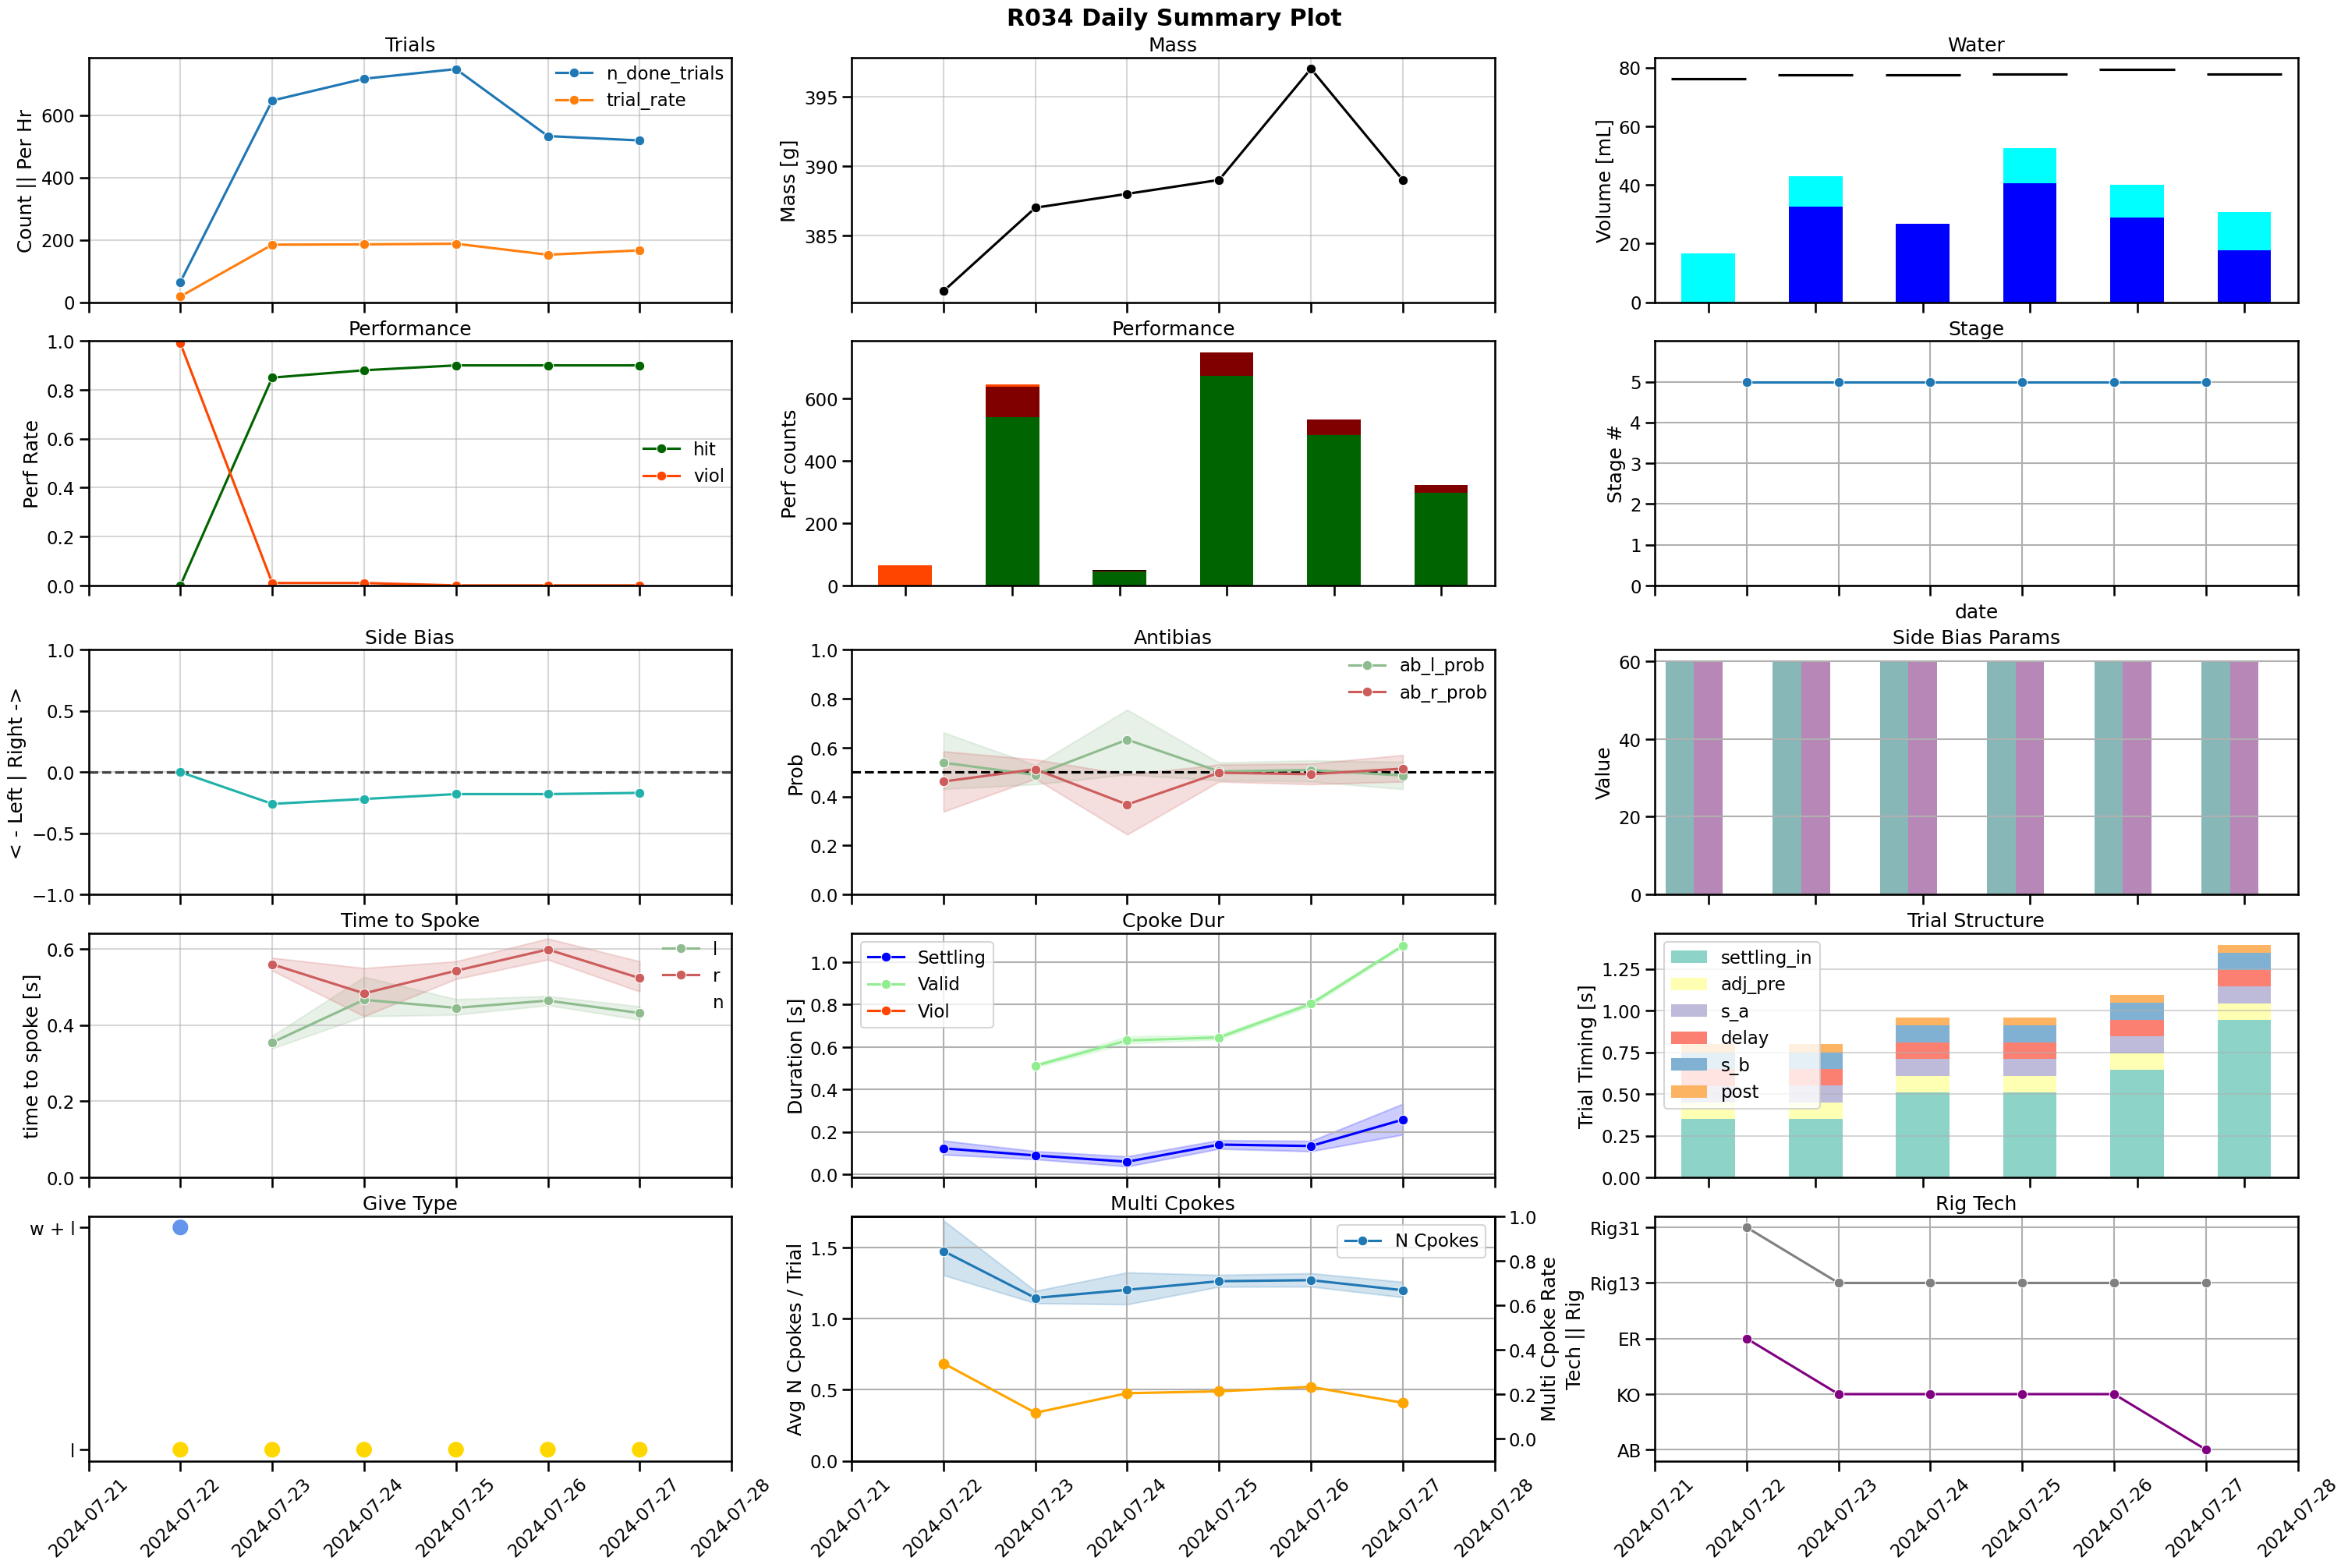

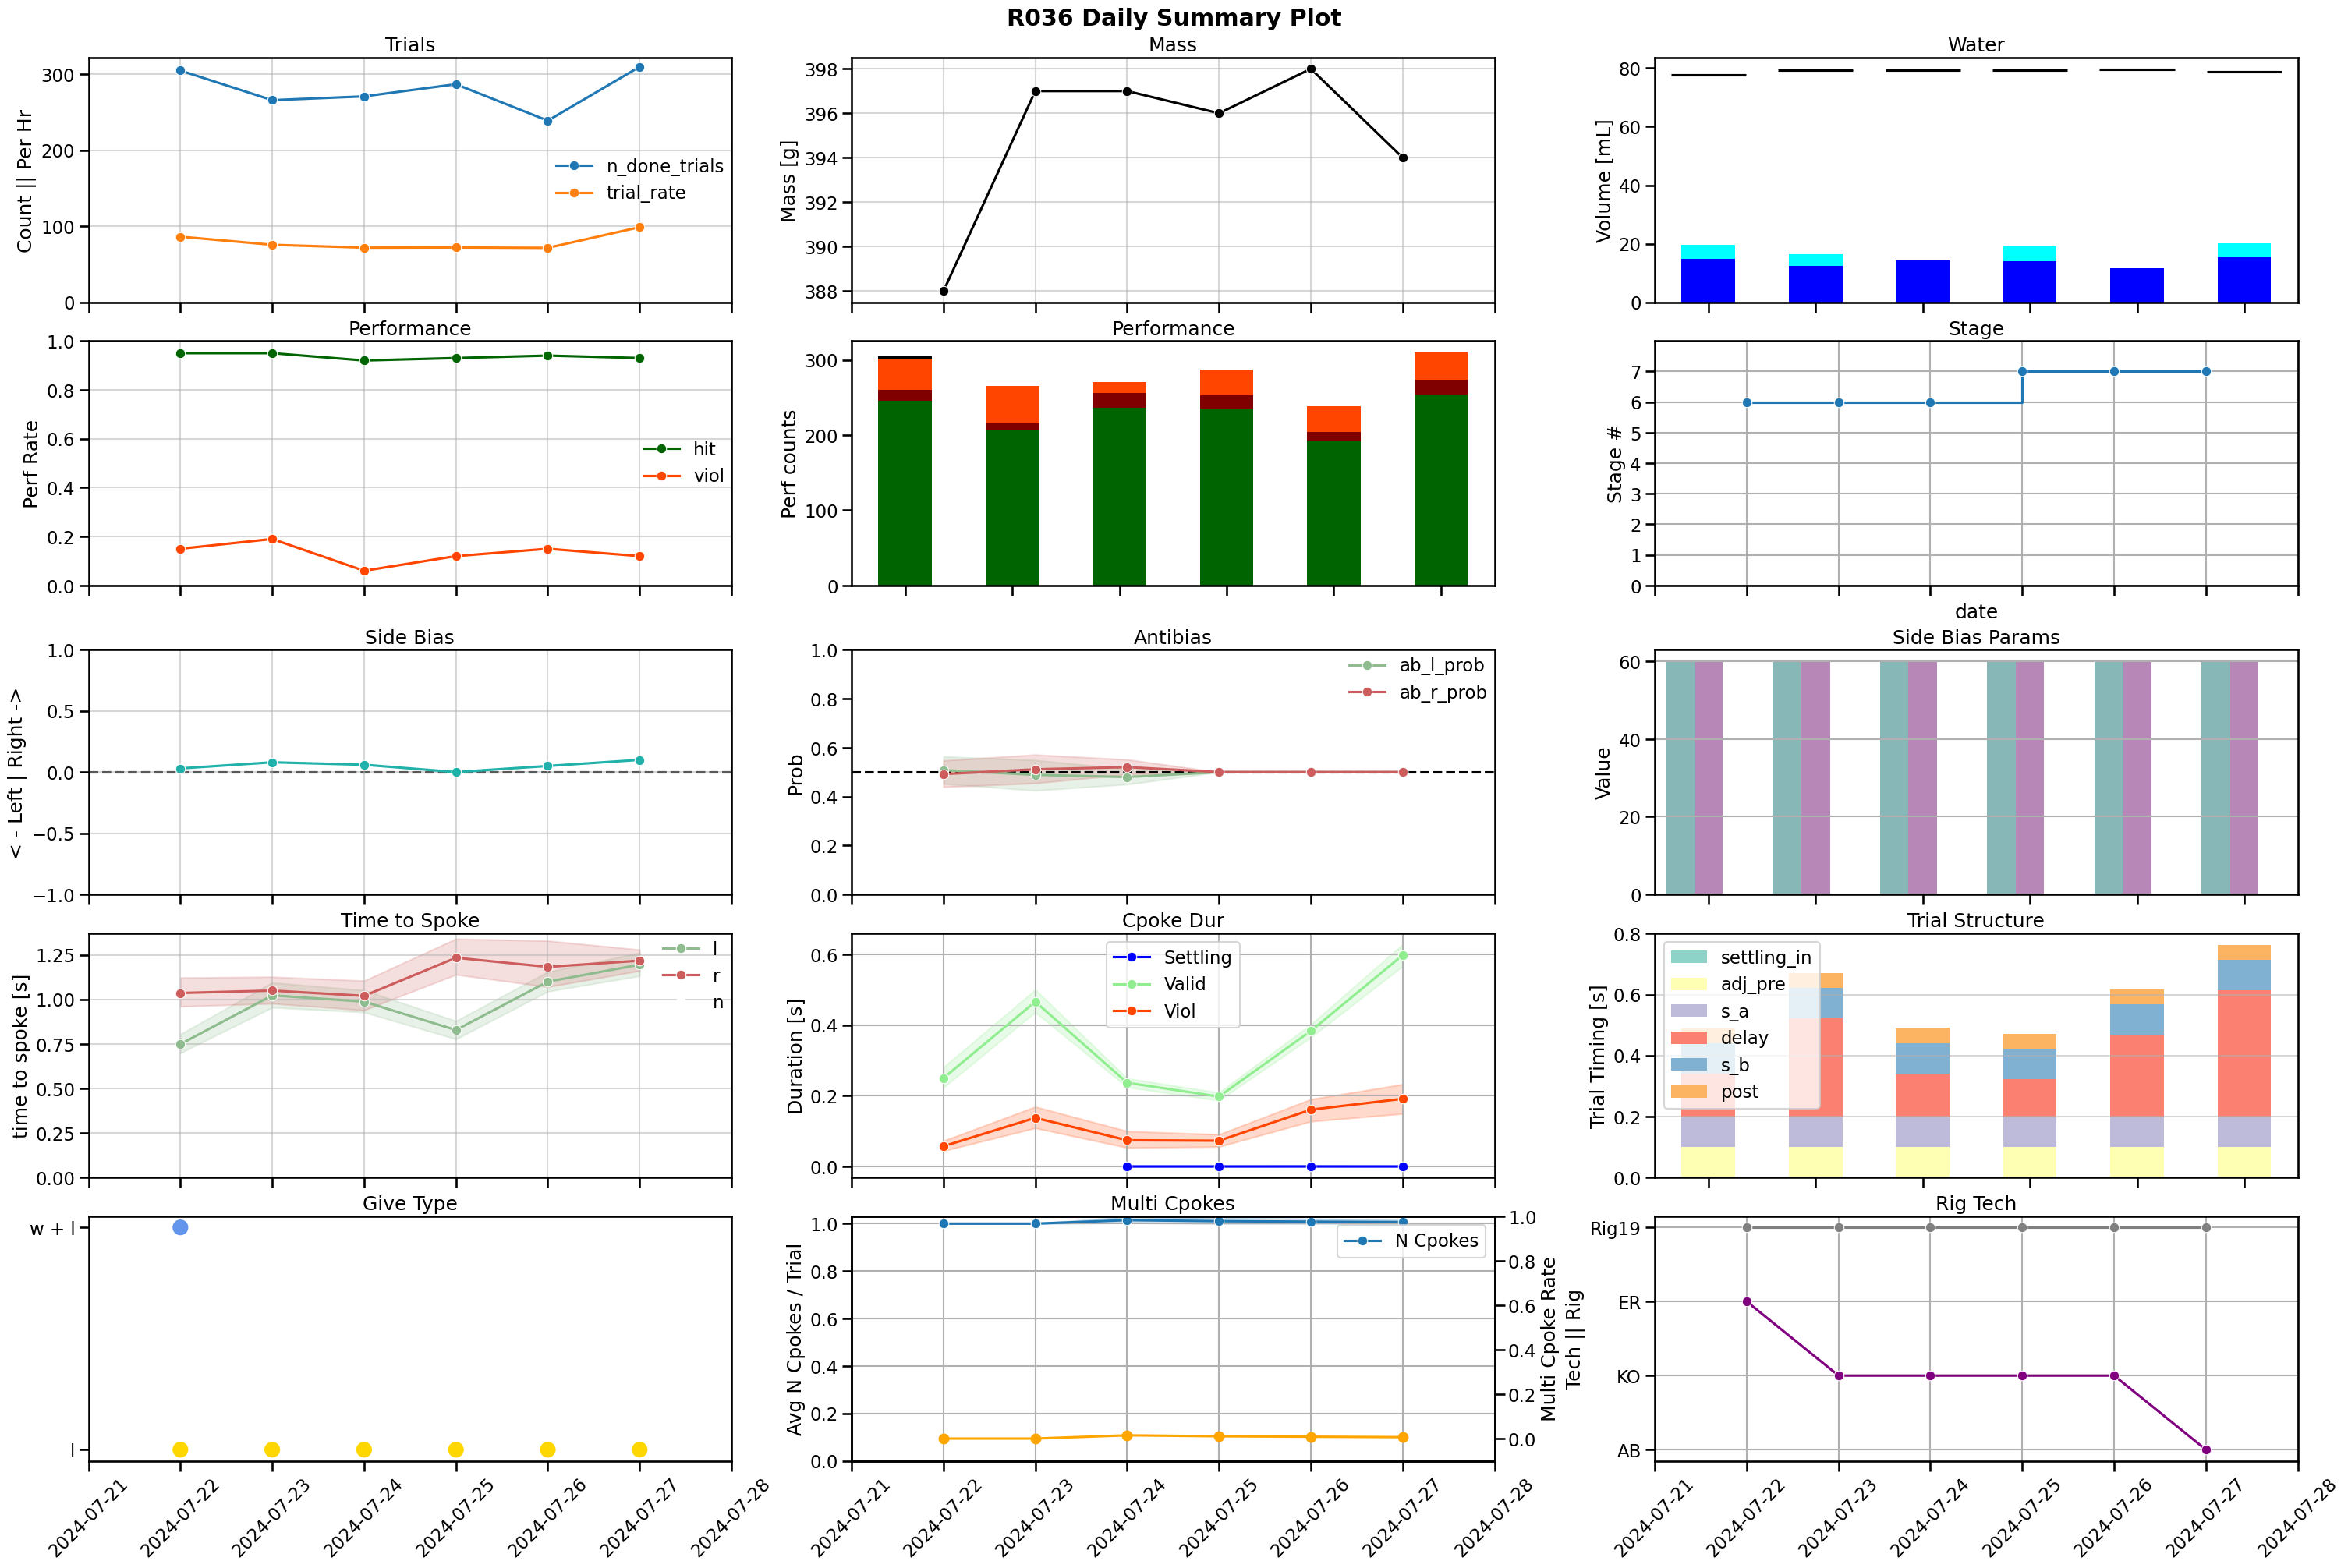

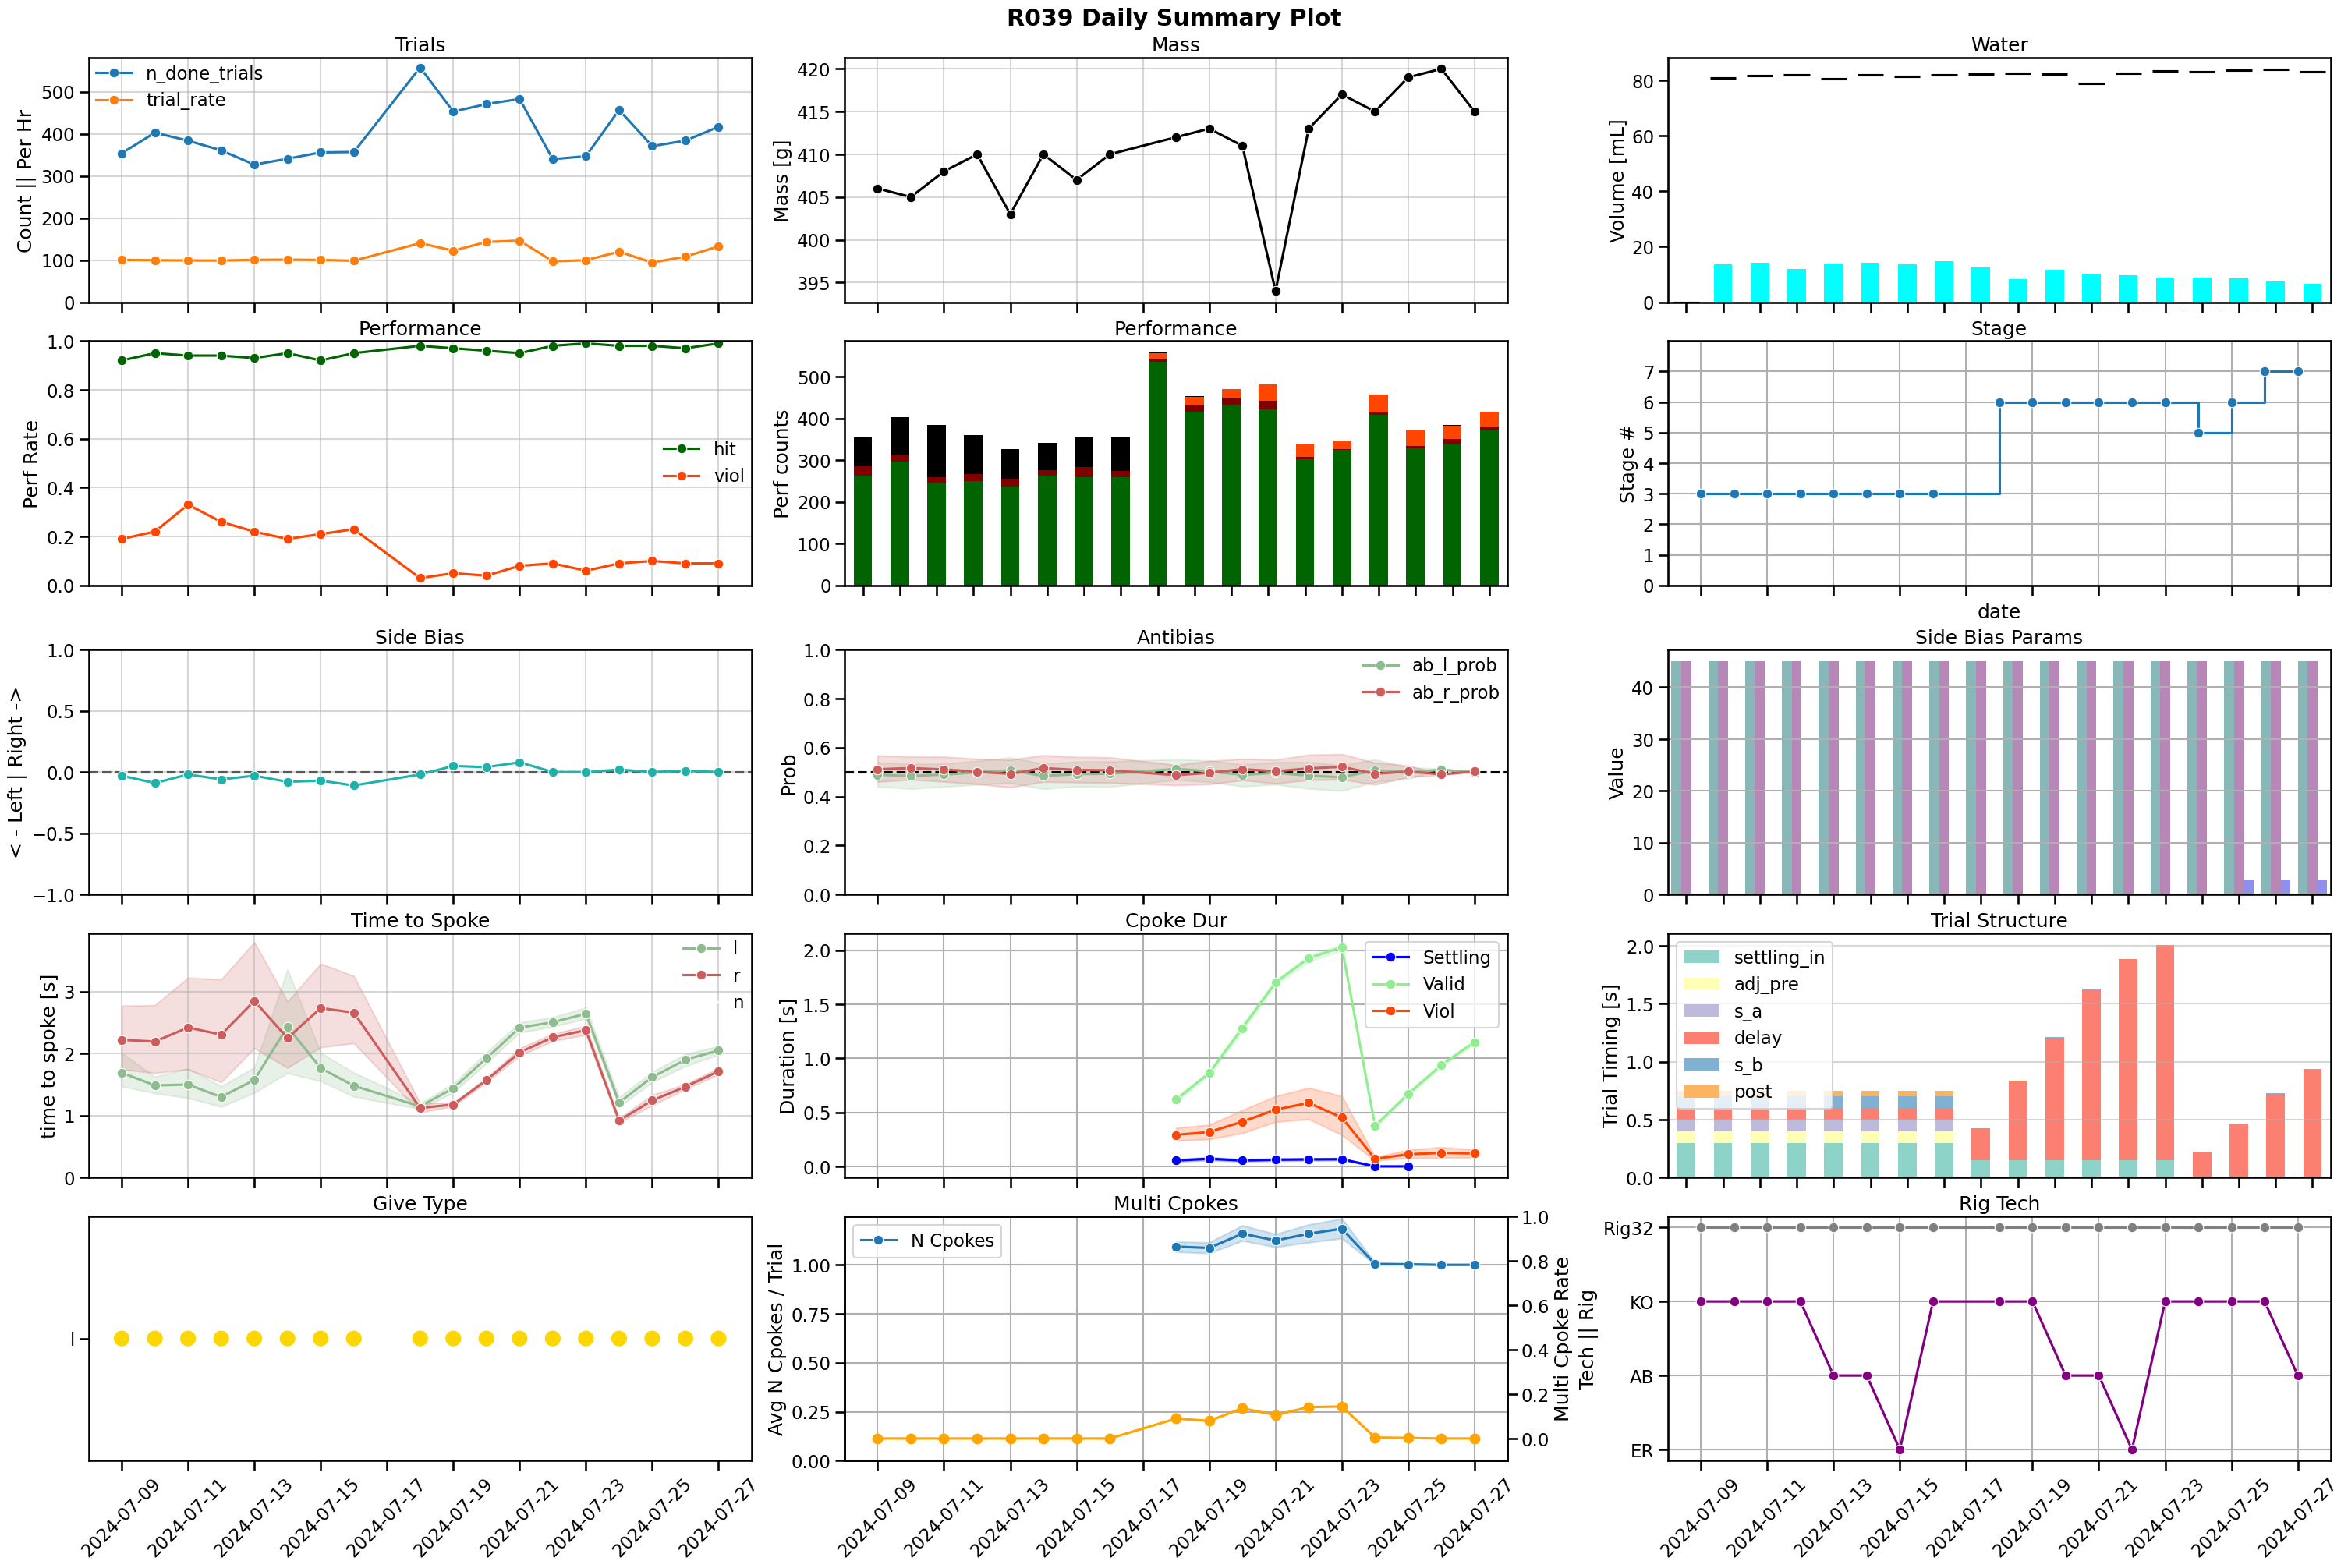

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [8]:
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R010_2024-07-26_day_summary
making R012_2024-07-26_day_summary
making R033_2024-07-26_day_summary
making R034_2024-07-26_day_summary
skipping failed cpokes plots due to hist error
making R036_2024-07-26_day_summary
making R039_2024-07-26_day_summary
making R010_2024-07-27_day_summary
making R012_2024-07-27_day_summary
making R033_2024-07-27_day_summary
making R034_2024-07-27_day_summary
skipping failed cpokes plots due to hist error
making R036_2024-07-27_day_summary
making R039_2024-07-27_day_summary


In [15]:
yesterday = today - timedelta(days=1)
trials_df.query("animal_id == 'R012' and date==@yesterday").delay_dur

24117    0.150000
24118    0.208054
24119    0.266107
24120    0.324161
24121    0.382215
           ...   
24431    1.598073
24432    1.598073
24433    1.599073
24434    1.600073
24435    1.601073
Name: delay_dur, Length: 319, dtype: float64

## Spoke Violations

In [ ]:
yesterday = today - timedelta(days=1)
r36 = trials_df.query("animal_id == 'R036'").query("date == @yesterday")

In [ ]:
r36.columns

Index(['trial', 'animal_id', 'date', 'sess_id', 'protocol', 'result', 'hits',
       'violations', 'temperror', 'hit_rate', 'error_rate', 'violation_rate',
       'temp_error_rate', 'n_lpokes', 'n_cpokes', 'n_rpokes', 'trial_dur',
       'trial_start', 'first_spoke', 'first_lpoke', 'first_rpoke',
       'n_settling_ins', 'avg_settling_in', 'cpoke_dur',
       'n_incorr_spokes_during_give_del', 'stage', 'stage_name', 'curriculum',
       'fix_experiment', 'sides', 'SMA_set', 'auto_spoke_to_cpoke', 'sa', 'sb',
       'stimuli_on', 'settling_in_dur', 'legal_cbreak_dur', 'pre_dur',
       'adj_pre_dur', 'stimulus_dur', 'delay_dur', 'post_dur', 'sb_extra_dur',
       'pre_go_dur', 'inter_trial_dur', 'fixation_dur', 'initial_fixation_dur',
       'target_fixation_dur', 'fixation_adjustment',
       'has_reached_target_fixation', 'settling_in_determines_fixation',
       'go_type', 'go_dur', 'give_type_set', 'give_type_imp', 'give_frac',
       'give_delay_dur', 'give_xtra_light_delay_dur', '

<Axes: xlabel='trial', ylabel='delay_dur'>

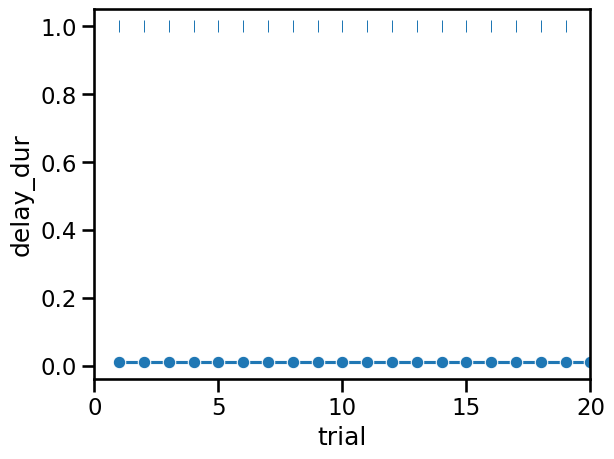

In [ ]:
sns.lineplot(r36, x="trial", y="delay_dur", marker="o")
plt.xlim(0, 20)
sns.scatterplot(r36, x="trial", y="delay_warm_up_on", marker="|")

# Dev

In [ ]:
for date, df in trials_df.groupby("date"):
    pass

In [ ]:
bool(df.settling_in_determines_fixation.iloc[0])

True

In [ ]:
viz.plot_trials_info.plot_avg_valid_cpoke_dur?

Signature:
viz.plot_trials_info.plot_avg_valid_cpoke_dur(
    trials_df,
    ax,
    mode='settling_in',
)
Docstring:
plot avg valid cpoke dur for per trial

params
------
trials_df : DataFrame
    trials dataframe with columns `cpoke_dur`
    with trials as row index
ax : matplotlib.axes
    axis to plot to
File:      ~/Desktop/github/jbreda_animal_training/src/behav_viz/visualize/plot_trials_info.py
Type:      function

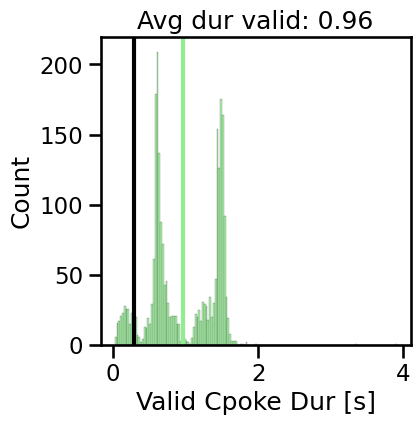

In [ ]:
from matplotlib import pyplot as plt

fig, ax = viz.plot_utils.make_fig("s")
viz.plot_trials_info.plot_avg_valid_cpoke_dur(df, ax, mode="violations")

In [ ]:
plot_avg_failed_cpoke_dur?

Object `plot_avg_failed_cpoke_dur` not found.


In [ ]:
from behav_viz.visualize.FixationGrower.single_day_plots import *

plot_avg_failed_cpoke_dur(df)

ModuleNotFoundError: No module named 'behav_viz.visualize.FixationGrower.single_day_plots'

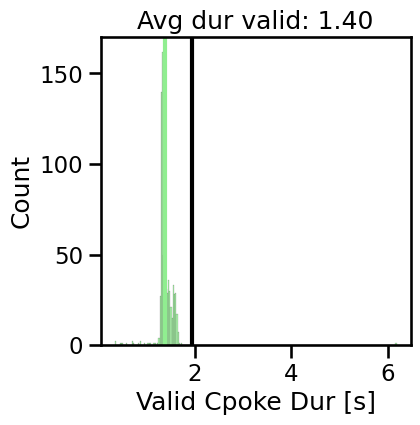

In [ ]:
plot_avg_valid_cpoke_dur(df)